In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Customer Churn.csv")

In [6]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", "0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
data["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
    if value == 1:
        return "YES"
    else:
        return "NO"

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)


In [13]:
data.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,NO,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,NO,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,NO,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,NO,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,NO,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


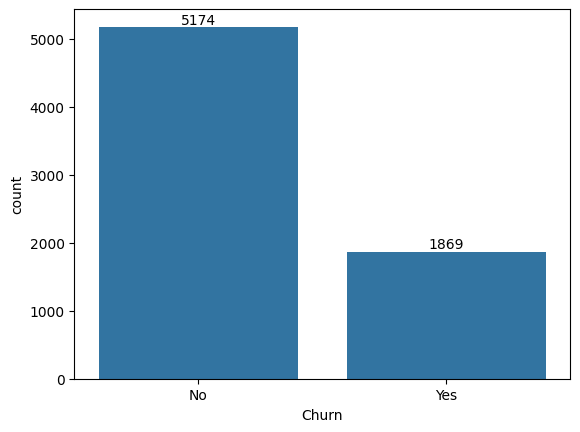

In [14]:
ax = sns.countplot(x ="Churn", data = data)
ax.bar_label(ax.containers[0])
plt.show()

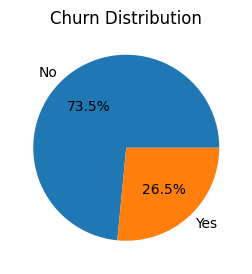

In [15]:
plt.figure(figsize=(3,4))
gb = data.groupby("Churn").agg({'Churn':'count' })
plt.pie(gb["Churn"],labels=gb.index, autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.show()

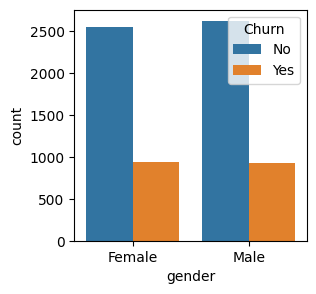

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data=data , hue="Churn")
plt.show()

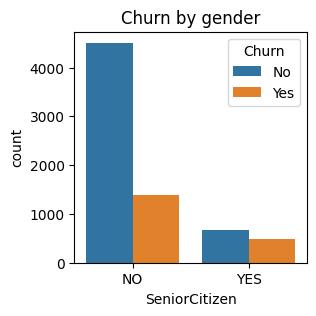

In [17]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen", data=data , hue="Churn")
plt.title("Churn by gender")
plt.show()

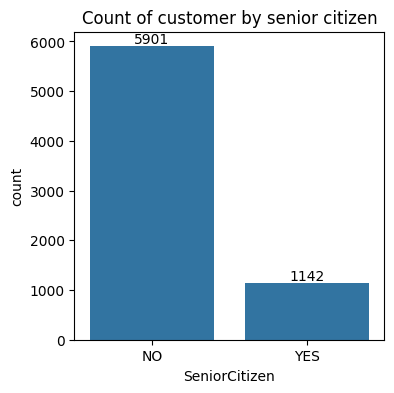

In [18]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=data)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by senior citizen")
plt.show()

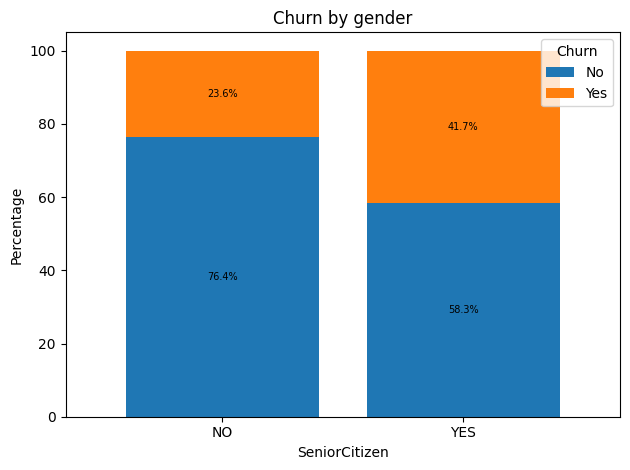

In [19]:

# Create a cross-tabulation
ct = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Normalize to get percentage
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
ax = ct_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)

# Add percentage labels
for i, (index, row) in enumerate(ct_percent.iterrows()):
    bottom = 0
    for churn_status in ct.columns:
        value = row[churn_status]
        if value > 0:
            ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=7)
            bottom += value

plt.title("Churn by gender")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.xticks(rotation=0)  # Set x-axis labels to horizontal
plt.tight_layout()
plt.show()


#---------

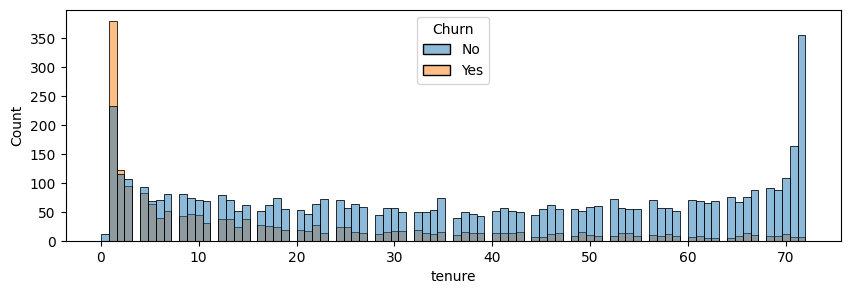

In [20]:
plt.figure(figsize=(10,3))
sns.histplot(x = "tenure", data =data, bins=90, hue="Churn")
plt.show()

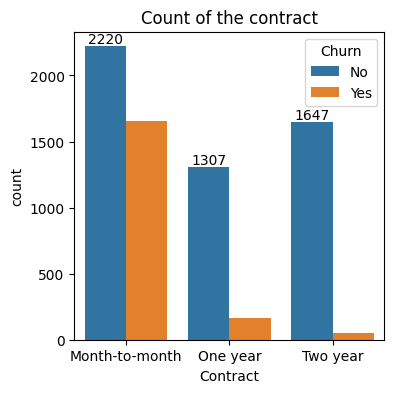

In [21]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=data, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of the contract")
plt.show()

In [22]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

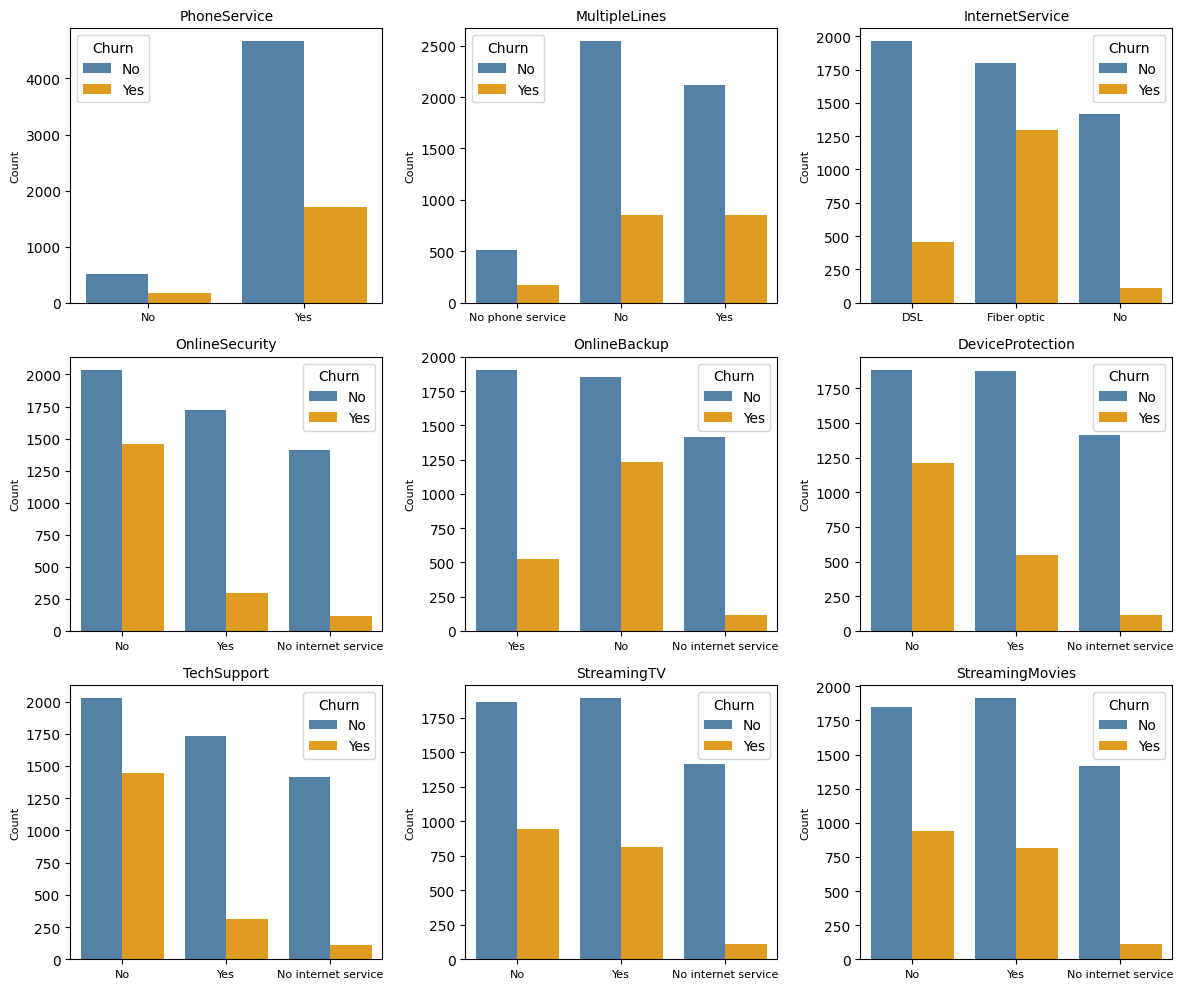

In [23]:
# List of service-related columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define custom color palette: Blue for 'No', Orange for 'Yes'
custom_palette = {'No': 'steelblue', 'Yes': 'orange'}

# Create subplots
plt.figure(figsize=(12, 10))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=data, hue="Churn", palette=custom_palette)
    plt.title(col, fontsize=10)
    plt.xlabel("")  # Remove x-axis label
    plt.ylabel("Count", fontsize=8)
    plt.xticks(rotation=0, fontsize=8)  # Keep labels horizontal

plt.tight_layout()
plt.show()


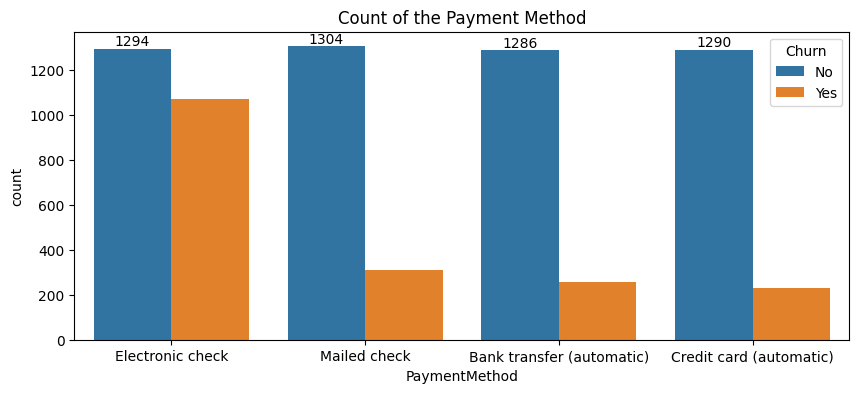

In [24]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="PaymentMethod", data=data, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of the Payment Method")
plt.show()

In [25]:
data.to_csv("churn_data.csv", index=False)